In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("mcdonalds.csv")
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
data.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [5]:
data['Age'].describe()

count    1453.000000
mean       44.604955
std        14.221178
min        18.000000
25%        33.000000
50%        45.000000
75%        57.000000
max        71.000000
Name: Age, dtype: float64

## Target Balance

<AxesSubplot:ylabel='yummy'>

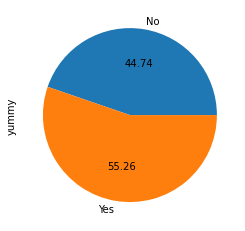

In [6]:
data.yummy.value_counts().sort_values().plot(kind = 'pie', autopct="%0.2f")

In [7]:
data['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

<AxesSubplot:>

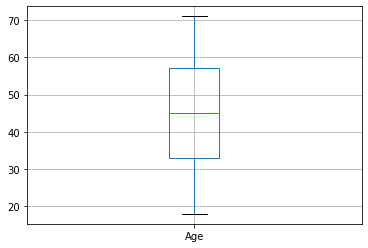

In [8]:
data.boxplot(column='Age')

## Dropping Irrelevant column

In [9]:
data = data.drop(['Like'], axis=1)

In [10]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,41,Every three months,Male


In [11]:
data["VisitFrequency"].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

## Feature Engineering

In [12]:
data = pd.get_dummies(data = data, columns = ['VisitFrequency'])

In [13]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,Gender,VisitFrequency_Every three months,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,61,Female,1,0,0,0,0,0
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,51,Female,1,0,0,0,0,0
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,62,Female,1,0,0,0,0,0
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,69,Female,0,0,0,0,1,0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,49,Male,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,47,Male,0,0,0,0,0,1
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,36,Female,0,0,0,0,1,0
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,52,Female,0,0,0,1,0,0
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,41,Male,1,0,0,0,0,0


In [14]:
from category_encoders import OrdinalEncoder
mapping = [{'col': 'yummy', 'mapping': {"Yes": 1,  "No": 0}}]
data = OrdinalEncoder(cols=['yummy'], mapping=mapping).fit(data).transform(data)

In [15]:
from category_encoders import OrdinalEncoder
mapping = [{'col': 'Gender', 'mapping': {"Male": 1,  "Female": 0}}]
data = OrdinalEncoder(cols=['Gender'], mapping=mapping).fit(data).transform(data)

In [16]:
from category_encoders import TargetEncoder
data = TargetEncoder(cols=['convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'], smoothing=1.0).fit(data, data['yummy']).transform(data)

In [17]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,Gender,VisitFrequency_Every three months,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year
0,0,0.592873,0.551253,0.535714,0.632267,0.570336,0.595402,0.092843,0.511538,0.491409,0.670909,61,0,1,0,0,0,0,0
1,1,0.592873,0.551253,0.535714,0.481046,0.570336,0.595402,0.806624,0.511538,0.491409,0.670909,51,0,1,0,0,0,0,0
2,0,0.592873,0.566176,0.535714,0.481046,0.570336,0.488851,0.806624,0.511538,0.799308,0.670909,62,0,1,0,0,0,0,0
3,1,0.592873,0.551253,0.535714,0.481046,0.570336,0.595402,0.806624,0.575563,0.491409,0.184136,69,0,0,0,0,0,1,0
4,0,0.592873,0.551253,0.535714,0.481046,0.570336,0.595402,0.092843,0.575563,0.799308,0.670909,49,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,0.592873,0.551253,0.535714,0.481046,0.393103,0.488851,0.092843,0.511538,0.491409,0.184136,47,1,0,0,0,0,0,1
1449,1,0.592873,0.551253,0.535714,0.632267,0.393103,0.595402,0.806624,0.575563,0.799308,0.670909,36,0,0,0,0,0,1,0
1450,1,0.592873,0.551253,0.535714,0.632267,0.570336,0.488851,0.806624,0.511538,0.491409,0.670909,52,0,0,0,0,1,0,0
1451,1,0.592873,0.551253,0.663212,0.632267,0.570336,0.595402,0.806624,0.575563,0.799308,0.670909,41,1,1,0,0,0,0,0


In [18]:
df = data.copy()

In [19]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,Gender,VisitFrequency_Every three months,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year
0,0,0.592873,0.551253,0.535714,0.632267,0.570336,0.595402,0.092843,0.511538,0.491409,0.670909,61,0,1,0,0,0,0,0
1,1,0.592873,0.551253,0.535714,0.481046,0.570336,0.595402,0.806624,0.511538,0.491409,0.670909,51,0,1,0,0,0,0,0
2,0,0.592873,0.566176,0.535714,0.481046,0.570336,0.488851,0.806624,0.511538,0.799308,0.670909,62,0,1,0,0,0,0,0
3,1,0.592873,0.551253,0.535714,0.481046,0.570336,0.595402,0.806624,0.575563,0.491409,0.184136,69,0,0,0,0,0,1,0
4,0,0.592873,0.551253,0.535714,0.481046,0.570336,0.595402,0.092843,0.575563,0.799308,0.670909,49,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,0.592873,0.551253,0.535714,0.481046,0.393103,0.488851,0.092843,0.511538,0.491409,0.184136,47,1,0,0,0,0,0,1
1449,1,0.592873,0.551253,0.535714,0.632267,0.393103,0.595402,0.806624,0.575563,0.799308,0.670909,36,0,0,0,0,0,1,0
1450,1,0.592873,0.551253,0.535714,0.632267,0.570336,0.488851,0.806624,0.511538,0.491409,0.670909,52,0,0,0,0,1,0,0
1451,1,0.592873,0.551253,0.663212,0.632267,0.570336,0.595402,0.806624,0.575563,0.799308,0.670909,41,1,1,0,0,0,0,0


## Applying PCA

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df = pca.fit_transform(df)

In [21]:
df

array([[-16.40416291,   0.46675768],
       [ -6.39170334,  -0.38097129],
       [-17.40058672,   0.14620771],
       ...,
       [ -7.38594054,  -0.95339238],
       [  3.60774473,  -0.17428475],
       [ 14.59364284,   1.05499726]])

## Finding the right number of cluster using Elbow method 

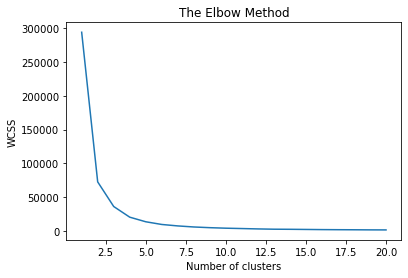

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([3, 0, 3, ..., 0, 2, 1])

## Visualising the cluster

<function matplotlib.pyplot.show(close=None, block=None)>

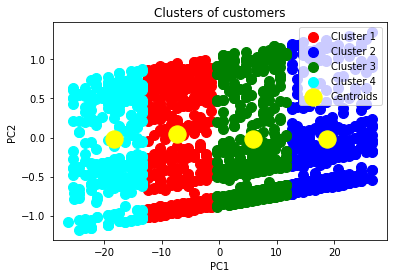

In [24]:
plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(df[y_kmeans == 3, 0], df[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show

## Plotting correlations

In [25]:
features = data.corr()['yummy'].sort_values(ascending= False)
features

yummy                                   1.000000
tasty                                   0.687280
disgusting                              0.419852
convenient                              0.253807
VisitFrequency_Once a month             0.251361
healthy                                 0.247183
VisitFrequency_Once a week              0.218511
VisitFrequency_More than once a week    0.154810
greasy                                  0.151853
fast                                    0.106836
cheap                                   0.105036
fattening                               0.087027
expensive                               0.061727
spicy                                   0.008742
VisitFrequency_Every three months      -0.052224
Gender                                 -0.062545
Age                                    -0.281653
VisitFrequency_Once a year             -0.293441
VisitFrequency_Never                   -0.320885
Name: yummy, dtype: float64

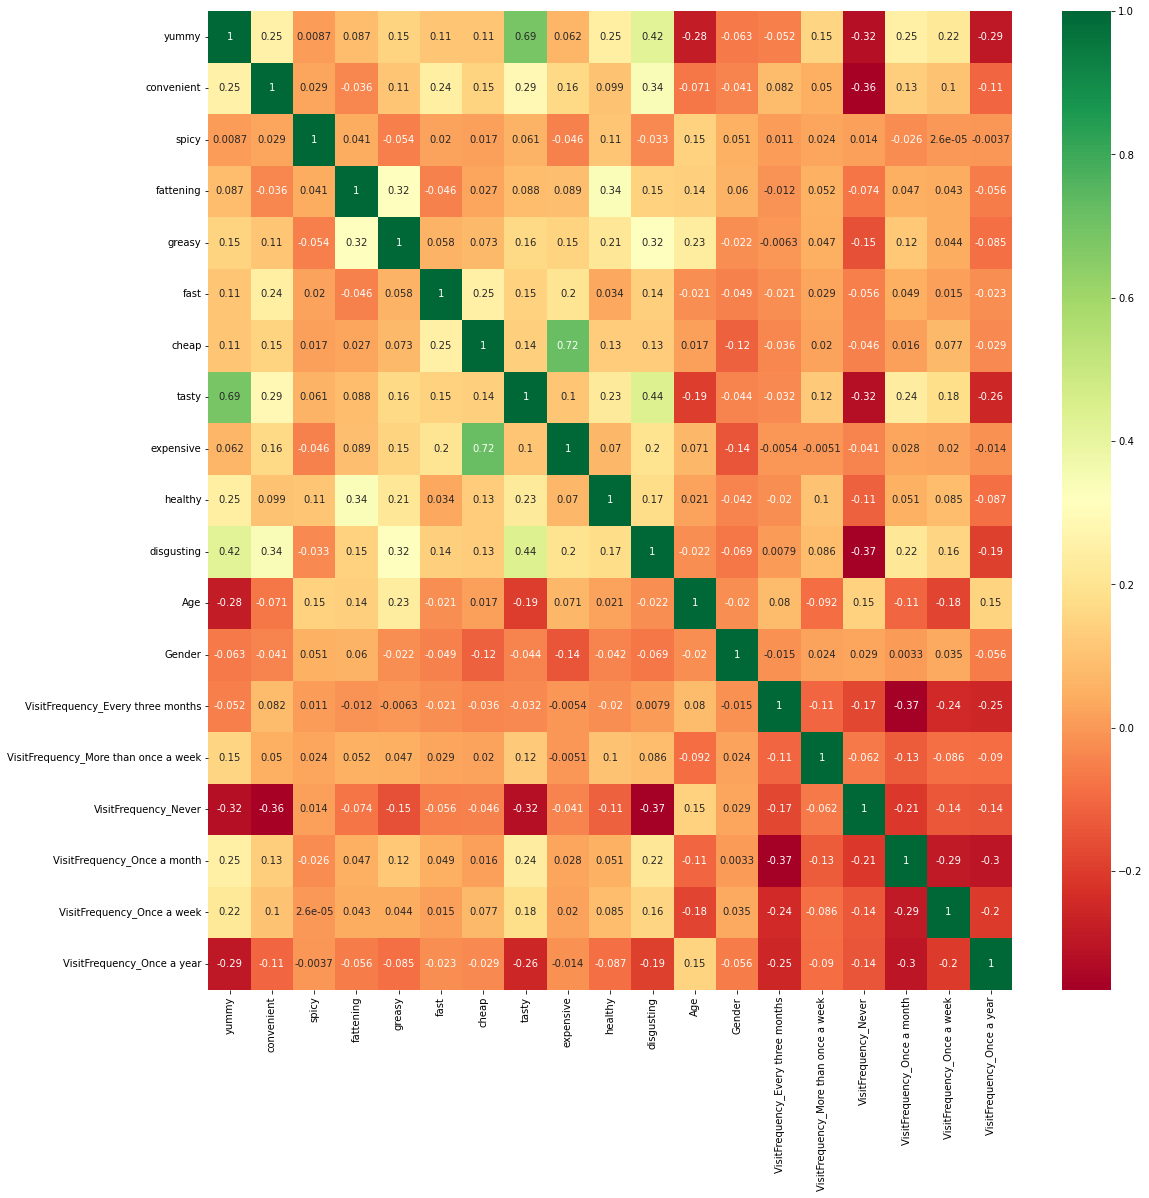

In [26]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

plt.show()

## Model Creation

In [29]:
X = data[['tasty', 'disgusting', 'convenient', 'VisitFrequency_Once a month', 'healthy', 'VisitFrequency_Once a week', 'VisitFrequency_More than once a week', 'greasy', 'fast', 'cheap']]
Y = data[['yummy']]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Hyperparameter Tuning for XGBoost classifier

In [32]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [33]:
classifier=xgboost.XGBClassifier()

In [34]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "verbosity"        : [0,1,2,3],
 "booster"          : ['gbtree', 'gblinear'],
 "validate_parameters" : ['false', 'true'],
 "disable_default_eval_metric" : ['false', 'true'],
 "eta"                         : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
 "tree_method"                 : ['auto', 'exact', 'approx', 'hist', 'gpu_hist'],
 "process_type"                : ['default', 'update'],
 "refresh_leaf"                : [0, 1],
 "grow_policy"                 : ['depthwise', 'lossguide'],
 "predictor"                   : ['cpu_predictor', 'gpu_predictor', 'auto', 'predictor']
 
    
}

In [35]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [36]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[20:30:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "grow_policy", "max_depth", "min_child_weight", "predictor", "process_type", "refresh_leaf", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          

In [37]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, disable_default_eval_metric='false',
              early_stopping_rounds=None, enable_categorical=False, eta=0.8,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=None,
              predictor='gpu_predictor', process_type='update', ...)

In [38]:
random_search.best_params_

{'verbosity': 1,
 'validate_parameters': 'false',
 'tree_method': 'exact',
 'refresh_leaf': 0,
 'process_type': 'update',
 'predictor': 'gpu_predictor',
 'min_child_weight': 5,
 'max_depth': 15,
 'learning_rate': 0.3,
 'grow_policy': 'lossguide',
 'gamma': 0.4,
 'eta': 0.8,
 'disable_default_eval_metric': 'false',
 'colsample_bytree': 0.7,
 'booster': 'gblinear'}

In [40]:
from xgboost import XGBClassifier
classifier = XGBClassifier(base_score=0.5, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, disable_default_eval_metric='false',
              early_stopping_rounds=None, enable_categorical=False, eta=0.8,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=5, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=None,
              predictor='gpu_predictor', process_type='update')
classifier.fit(X_train, y_train)

[20:30:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "grow_policy", "max_depth", "min_child_weight", "predictor", "process_type" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, disable_default_eval_metric='false',
              early_stopping_rounds=None, enable_categorical=False, eta=0.8,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=None,
              predictor='gpu_predictor', process_type='update', ...)

In [41]:
y_pred_xg = classifier.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred_xg)
print(cm)
Precision = precision_score(y_test, y_pred_xg)
Recall = recall_score(y_test, y_pred_xg)
print(Precision)
print(Recall)

[[ 91  29]
 [ 16 155]]
0.842391304347826
0.9064327485380117


In [43]:
from sklearn.metrics import  accuracy_score, f1_score
Accuracy = accuracy_score(y_test, y_pred_xg)
print(Accuracy)
F1_score = f1_score(y_test, y_pred_xg)
print(F1_score)

0.845360824742268
0.8732394366197183


In [44]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[20:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "grow_policy", "max_depth", "min_child_weight", "predictor", "process_type" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "grow_policy", "max_depth", "min_child_weight", "predictor", "process_type" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you f